<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 5 - Accuracy Measures</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

---
## Installing and Importing Libraries

In [ ]:
import sklearn
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt #visualisation
%matplotlib inline

## Loading the Dataset

[Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices):

You can download the dataset from the link.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado.csv


In [ ]:
df = pd.read_csv("avocado.csv")

In [ ]:
df.head(6)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany


In [ ]:
df.shape

(18249, 14)

In [ ]:
prices = df["AveragePrice"]

In [ ]:
prices

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


In [ ]:
df = df.drop(["AveragePrice", "type", "region", "Date"], axis=1)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Total Volume,float64
4046,float64
4225,float64
4770,float64
Total Bags,float64
Small Bags,float64
Large Bags,float64
XLarge Bags,float64
year,int64


In [ ]:
# First, let's normalize the data
from sklearn.preprocessing import StandardScaler
normalized_df = StandardScaler().fit_transform(df)

In [ ]:
# Now let's perform a simple linear regression on the data
from sklearn import linear_model
model = linear_model.Ridge(alpha = 300)
model.fit(normalized_df, prices)

Ridge(alpha=300)

In [ ]:
predicted_prices = model.predict(normalized_df)

In [ ]:
predicted_prices

array([1.46227752, 1.45879617, 1.45948193, ..., 1.52728097, 1.52434108,
       1.52141241])

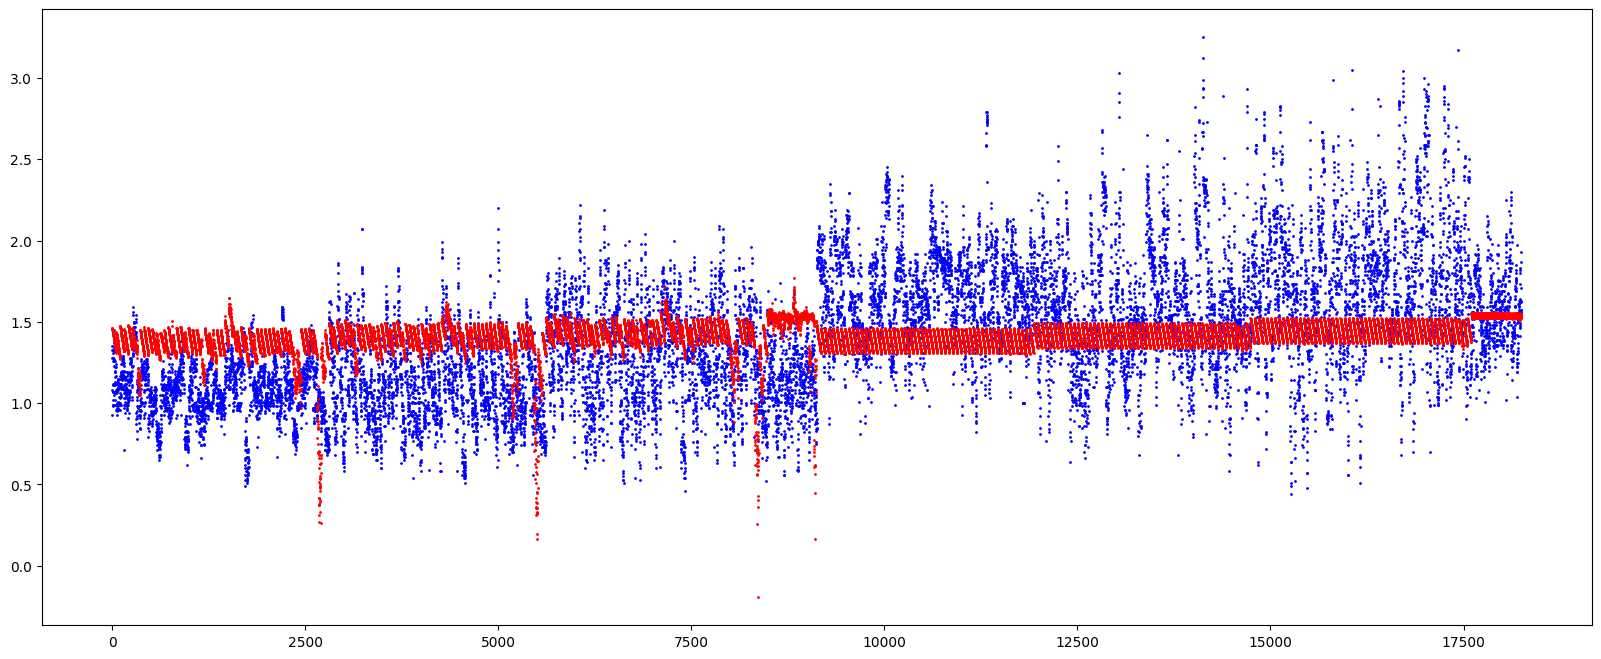

In [ ]:
plt.figure(figsize=(20,8))
x = np.arange(0,len(prices),1)
plt.scatter(x,prices,c='b',s=1)
plt.scatter(x,predicted_prices,c='r',s=1)
plt.show()

#### Mean Squared Error (MSE)
Now let's calculate MSE, defined as

$\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

where $N$ is the total number of data points, $y_i$ are actual prices, and $\hat{y}_i$ are our predictions.

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(prices, predicted_prices)
print('MSE is %.4f' %MSE)

MSE is 0.1505


#### Mean Absolute Error (MAE)

Next, let's calculate MAE, defined as

$\frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|$

As before, $N$ is the total number of data points, $y_i$ are actual prices, and $\hat{y}_i$ are our predictions.

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(prices, predicted_prices)
print('MAE is %.4f' %MAE)

MAE is 0.3116


#### Mean Absolute Percentage Error (MAPE)
Now that we have measured MAE and MSE, how do we know if they are good? In other words, we know that if MSE and MAE are 0, we have a perfect prediction But what about values other than 0? Is an MSE of 0.1 good or bad?

To have a better picture, we can calculate Mean Absolute Percentage Error (MAPE):


$\frac{1}{N} \sum_{i=1}^{N} |\frac{y_i - \hat{y}_i}{y_i}|$

Where $N$ is the total number of data points, $y_i$ are actual prices, and $\hat{y}_i$ are our predictions.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(prices, predicted_prices)
print('MAPE is %.4f' %MAPE)

MAPE is 0.2438


The next metric we can measure is $R^2$ score, defined as

$1 - \frac{\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}$

As before, $N$ is the total number of data points, $y_i$ are actual prices, $\hat{y}_i$ are our predictions and $\bar{y}$ is the average of all prices.

Basicially, $R^2$ score measure how much better we are perfroming compared to the simple "average predictor".

In [ ]:
from sklearn.metrics import r2_score
R2_score = r2_score(prices, predicted_prices)
print('R2 Score is %.4f' %R2_score)

R2 Score is 0.0718


#### Binary Classification Accuracy Metrics

[Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [ ]:
uploaded = files.upload()

Saving BCW.csv to BCW.csv


In [ ]:
df = pd.read_csv("BCW.csv")

In [ ]:
df.shape

(569, 33)

In [ ]:
df.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [ ]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
diagnosis_types = df['diagnosis']
df = df.drop(["diagnosis"], axis = 1)

In [ ]:
diagnosis_types

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df, diagnosis_types, test_size=.5)

In [ ]:
X_train.shape

(284, 32)

In [ ]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
predicted_diagnosis_types = classifier.predict(X_test)

In [ ]:
predicted_diagnosis_types

array(['M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M

In [ ]:
from sklearn.metrics import accuracy_score
print('Calssification accruacy is %.2f' %accuracy_score(predicted_diagnosis_types, y_test))

Calssification accruacy is 0.90


##### Precision & Recall:

In [ ]:
precision_array = []
recall_array = []
for c in ['M', 'B']:
  actual_class = y_test==c
  predicted_class = predicted_diagnosis_types == c

  ture_positives = sum(np.multiply(actual_class,predicted_class))
  declared_positives = sum(predicted_class)
  actual_positives = sum(actual_class)

  precision = ture_positives/(0.0001+ declared_positives)
  recall = ture_positives/(0.0001+ actual_positives)
  precision_array.append(precision)
  recall_array.append(recall)

precision_array = np.array(precision_array)
recall_array = np.array(recall_array)

In [ ]:
precision_array

array([0.80314897, 0.97468293])

In [ ]:
print('Average precision is: %.2f' %precision_array.mean())
print('Average recall is: %.2f' %recall_array.mean())

Average precision is: 0.89
Average recall is: 0.91


In [ ]:
from sklearn.metrics import precision_score, recall_score
print('Average (Macro) precision is %.2f' %precision_score(y_test, predicted_diagnosis_types,average='macro'))

Average (Macro) precision is 0.89


##### F1-Score:

In [ ]:
f1_array = []
for c in [0, 1]:
  p, r = precision_array[c], recall_array[c]
  f1 = 2*p*r / (p+r)
  f1_array.append(f1)
  print('F1-Score for class %d is %.2f' %(c,f1))

F1-Score for class 0 is 0.88
F1-Score for class 1 is 0.91


In [ ]:
# Macro F1-Score
print('Macro F1-score is %.2f' %np.array(f1_array).mean())

Macro F1-score is 0.89


In [ ]:
from sklearn.metrics import f1_score
f1s = f1_score(y_test, predicted_diagnosis_types, average='macro')
print('Macro-averaged F1-score is %.2f' %f1s)

Macro-averaged F1-score is 0.89


### Multi-class Classification Accuracy Metrics

This time, instead of loading a dataset (e.g. movie genre prediction), we create one! This is excellent for practicing our skills later on.

In [ ]:
from sklearn.datasets import make_multilabel_classification
X, Y = make_multilabel_classification(
    n_samples=1500, n_features=15,
    n_classes=6, n_labels=4,
    allow_unlabeled=False,
)

In [ ]:
X.shape, Y.shape

((1500, 15), (1500, 6))

In [ ]:
# Splitting data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=.25)

In [ ]:
# Training the classfier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
classifier = OneVsRestClassifier(SVC(kernel='linear'))
classifier.fit(X_train, Y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Macro-averaged precision is %.2f' %precision_score(Y_test,predictions,average='macro'))
print('Macro-averaged recall is %.2f' %recall_score(Y_test,predictions,average='macro'))

Macro-averaged precision is 0.72
Macro-averaged recall is 0.80


In [ ]:
print('Micro-averaged precision is %.2f' %precision_score(Y_test,predictions,average='micro'))
print('Micro-averaged recall is %.2f' %recall_score(Y_test,predictions,average='micro'))

Micro-averaged precision is 0.73
Micro-averaged recall is 0.81


In [ ]:
# Calculating precision for each class
precision_per_class = precision_score(Y_test, predictions, average=None)
print("Precision for each class:", precision_per_class)

Precision for each class: [0.72289157 0.725      0.68       0.74822695 0.73306773 0.73161765]


In [ ]:
# Calculating recall for each class
recall_per_class = recall_score(Y_test, predictions, average=None)
print("Recall for each class:", recall_per_class)

Recall for each class: [0.9375     0.74742268 0.61340206 0.8647541  0.81057269 0.82572614]


In [ ]:
# Calculating F1-scores using different averaging methods
macro_f1 = f1_score(Y_test, predictions, average='macro')  # Macro-averaged F1-score
weighted_f1 = f1_score(Y_test, predictions, average='weighted')  # Weighted-averaged F1-score
micro_f1 = f1_score(Y_test, predictions, average='micro')  # Micro-averaged F1-score

In [ ]:
# Printing the F1-score results
print("Macro-averaged F1-score:", macro_f1)
print("Weighted-averaged F1-score:", weighted_f1)
print("Micro-averaged F1-score:", micro_f1)

Macro-averaged F1-score: 0.7575563159102544
Weighted-averaged F1-score: 0.7628257082750576
Micro-averaged F1-score: 0.7656903765690377


Suppose we have a multi-label classification problem in the field of football, where each sample (player) can belong to some of 4 classes that we have:
Class 1: The player has played for the national team before
Class 2: The player had previous history of heart problems
Class 3: The player had knee injuries before
Class 4: The player has been the captain of the team in the past
What accuracy metric do you use to best capture the accuracy of classification algorithm which predicts the above classes based on some data from each player and why?

Answer:

#### 1. **Micro-Averaged F1-Score**
- Treats all labels equally.
- Balances precision and recall globally.
- **Use when:** All classes (e.g., injuries, captaincy, etc.) are equally important.

#### 2. **Weighted-Averaged F1-Score**
- Accounts for class imbalance by weighting by support.
- **Use when:** Some classes are more frequent (e.g., many players were captains, few had heart issues).

#### 3. **Hamming Loss** (Alternative)
- Measures how many labels are incorrectly predicted.
- **Use when:** You want to reduce per-label prediction errors.

### Final Recommendation
- **Use Micro-F1** when class importance is balanced.
- **Use Weighted-F1** if classes are imbalanced.
